<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, key words for weekRF Panda Numpy MOM MLE</div>
<div style="text-align: right">Zixiao Wang , 11 November 2019, with material from Dino Konstantopoulos</div>

# Key words for Week 4 RF Panda Numpy MOM MLE

## Mathematical concept

## Python

### 1. [Numpy](Lecture4a-Introduction%20to%20numpy%20pandas/introduction-to-numpy-fa19.ipynb)

`NumPy` is our performance and math library. It's a C-module, so it gets compiled to machine code and is blazing fast. It;s the **engine** that makes the Python snail fast!

Numpy adds Python support for large multi-dimensional arrays and matrices, along with a library of high-level mathematical functions to operate on these arrays. Numpy is the first and lowest level data science extension for Python. It focuses on number calculations, reads in fixed datatypes, improves RAM efficiency, and teaches you to think in **Vectors**, **Matrices**, and **Tensors**.

### 2. [Panda](Lecture4a-Introduction%20to%20numpy%20pandas/introduction-to-pandas-fa19.ipynb)

`pandas` is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

- Ordered and unordered (not necessarily fixed-frequency) *time series* (1D) data

- Arbitrary *matrix* (2 and higher D) data (homogeneously typed or heterogeneous) with row and column labels

- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features are:

- Shape mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically

- Intuitive merging and joining of data sets

- Flexible reshaping and pivoting of data sets

- Robust IO tools for loading data from flat files, Excel files, databases, HDF5, etc.

- Build-in statistics and linear regressions, extensible with additional packages (e.g. statsmodels)

After this lecture, chances are you will never use Excel functions to analyze data anymore, and instead you will import your excel spreadsheet into a notebook and use pandas & friends for your data analysis :-) (ok, sometimes you might still use RStudio).

## Mathematical

### 1. Random Regression Forests

The idea behind **decision tress** is to split a dataset based on **homogeneity of data**. A **decision tree** is built top-down from a **root node** and involves partitioning the data into **subsets** that contain instances with similar **values** (homogenous). 

On the other hand, in a **regression tree**, since the target (dependent) variable is a real valued number, we fit a regression model to the target variable using each of the ***independent variables***. 

Then for each independent variable, the data is split at several **split points**. We calculate [Sum of Squared Error(SSE)](https://hlab.stanford.edu/brian/error_sum_of_squares.html) at each split point between the predicted value and the actual values. The variable resulting in minimum SSE is selected for the node. Then this process is recursively continued till the entire data is covered. Each split point may belong to a different independent variable.

All of us actually use decision trees in our daily life! To illustrate the concept, let's use an everyday example: predicting tomorrow’s maximum temperature for Boston. Wasn't today better than two days ago?!

In order to answer the single max temperature question, we need to work through an entire series of queries. We start by forming an initial reasonable range given our domain knowledge, which for Boston is very little.. Let's say that it's 40–90 degrees Fahrenheit. Gradually, through a set of questions and answers we will reduce this range until we are confident enough to make a single prediction.

What makes a good question to start with? What kind of idnependent variable should we split the data by? Well, if we want to limit the range **as much as possible** initially, let's think of the most relevant question to ask. Since temperature is highly dependent on time of year, a decent place to start would be: what season are we in? Fall, right? So we can limit the prediction range to 40–90 degrees because we have an idea of what the general max temperatures are in Boston fall. This first question already cuts our range by a lot. We use that independent variable as our first node variable. But, this question isn’t quite enough to narrow down our estimate so we need to find out more information for our second node.

A good follow-up question is: what is the historical average max temperature on this day? For Boston, the answer is 56 degrees. This allows us to further restrict our range of consideration to, let's say, 40–60 degrees. 

Two questions (two nodes)  are still not quite enough to make a prediction because this year might be warmer or colder than average. Therefore, we also would want to look at the max temperature today to get an idea if the year has been unusually warm or cold. Our question is simple: what is the maximum temperature today? If the max temperature today was 60 degrees, it might be colder this year and our estimate for tomorrow should be a little lower than the historical average. At this point, we can feel pretty confident in making a prediction of 55 degrees for the max temperature tomorrow. 

So, to arrive at an estimate, we used a series of questions, with each question narrowing our possible values until we were confident enough to make a single prediction. So, following one path (the most probable one) down the tree, we used 3 nodes to make a decision. 

We also need to complete all paths and add nodes to all split points so we have a decision for each leaf of the tree (we did not do this in our questioning above).

**Regression Forests** are different than a single tree: They are an **ensemble** of different regression trees. These models work on the principle of the **wisdom of the crowd** . In short, it is better to consider the opinions of 1000 different people with not much knowledge than to consider the opinion of only one expert (provided the 1000 people have accuracy better than random guessing, i.e more than 50%). There is actually a mathematical proff about this.

### 2. Classical Statical Analysis

The primary goal of statistical data analysis is to create a model for the datapoints so you can throw away the data and use the model instead.

#### 2.1 [Distributions](../Summary/Distribution%20Summary.ipynb)

#### 2.2 Method Of Moments (MOM, 矩估计)

![mom1](./res/mom1.jpg)
![mom1](./res/mom2.jpg)

#### 2.3 Maximum Likelihood Estimation (MLE, 最大似然估计)

MLE is a method of estimating the *parameters* of a statistical model, given observations. MLE attempts to find the parameter values that ***maximize the likelihood function, given the observations***.

MLE is used often with **count models** (general rule of thumb for Count models is that it is risky to use ML with samples smaller than 100, while samples over 500 seem adequate, so if you have only a couple hundred datapoints, ML won't work! In which case you need to fall back to theory, which is what we're doing here), and when we are interested in a dataset $(x,y)$ but are unable to obtain $y$ for the entire population $x$ and only able to obtain the $y$'s for a ***subset*** of $x$. 

So we assume all $y$ are **normally (gaussian) distributed** with some unknown **mean** and **variance**. The mean and variance are estimated with MLE while only knowing the $y$'s of the subset of $x$. 

- In general, when you have no idea about the distribution of data, and there are too few datapoints for a good historgram, start by assuming a gaussian distribution.

Here's the secret sauce of the algorithm:

- MLE accomplishes this by taking the mean and variance as **parameters**, and finding values for these parameters that make the observed results (the subset) the ***most probable given the normal model***. The analysis is an **iterative** one, which proceeds until a metric called the **log likelihood** ***converges***.



* **Likelihood**

![likelihood1](./res/likelihood1.jpg)

* **MLE**

![likelihood2](./res/likelihood2.jpg)

* **Discrete value in MLE**

![likelihood3](./res/likelihood3.jpg)

* **Continued value in MLE**

### Conclusion
What do you need to know?

- MOM equates the empirical and theoretical moments to yield the parameters of your model. 

- MLE gives you the value which maximises the Likelihood P(D|θ). 

- [Maximum a Posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP), which we skipped over, yields the value which maximises the posterior probability P(θ|D). As both methods give you a single fixed value, they’re considered to be **point estimators**.

- How to numerically evaluate the parameters of your model using the first two methods. You do not need to know the math (but if you understand it, that is a good thing!)

**Bayesian inference**, as we will see next week, ***fully calculates the posterior probability distribution***, as Bayes' formula below. 

$$p(θ \; | \; D) = \frac{p(D \; | \; θ) \; p(θ)}{p(D)}$$

Hence the output is not a single value, i.e. a **point estimate** for the parameters of your model, but a **probability density function*** (when θ is a continuous variable) or a ***probability mass function*** (when θ is a discrete variable) ***for the parameters of your model***. That way, you know what the most likely value is, ***but also the amount of error you might be making***!

- MLE and MAP return a single fixed value(s) for the model parameter, but Bayesian inference returns functions (pdfs)  instead!

Assume you’re in a casino with full of slot machines with 50% winning probability. After playing for a while, you hear a rumour that there’s ***one special slot machine*** with 67% winning probability!

Now, you’re observing people playing 2 suspicious slot machines (you’re sure that one of those is the special slot machine!) and get the following data.

Machine A: 3 wins out of 4 plays
Machine B: 81 wins out of 121 plays

By intuition, you would think machine B is the special one! Because 3 wins out of 4 plays on machine A could just happen by chance. But machine B’s data doesn’t look like it's happening by chance!

The posterior probability distribution P(θ|D), calculated as a Gamma function, is plotted below for the two machines:

<br />
<center>
<img src =Lecture4D2/images/tricked-slot-machines.png width = 400 />
</center>

Although both distributions have their mode on θ=0.666 (MLE estimate), the shapes of the distributions are quite different. Density around the mode is much higher in the distribution of machine B than the one of machine A.

So a pdf yields much more information than a point estimate. In particular, it tells us about errors in the estimation. And that is very important when a model is making a potentially dangerous prediction (e.g. ***drive 120 mph on this road***).

***Ummm... computer, what's an estimation of the error you might be making in your prediction?***

<br />
<center>
<img src =Lecture4D2/images/crazy-robot.jpg width = 300 />
</center>

So we will now turn our attention to Bayesian estimation. Bayes' formula is actually pretty complex. Specifically, the term in the denominator, a **marginal probability**,  needs to be calculated for every possible θ:

<br />
<center>
<img src =Lecture4D2/images/bayes-complex.png width = 500 />
</center>

That integral sum (for the continuous case, a simple sun for discrete cases) is the reason why we had to wait for powerful laptops before we could actually put Bayesian estimation to practice. 

When the model is ***analytic***, like the ones in this notebook, solutions are forthcoming, albeit with a bit of math. But that is rarely the case in real-world applications. We then need to use ***Monte Carlo*** and other probabilistic programming methodologies as substitute for direct integral computation. That is what we'll look at next week.

## Implements

### 1. Random Regression Forests

In [1]:
# import the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
# transform the data into dataframe type
import pandas as pd
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
# check the X
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check the y
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [7]:
# build the random forests regression model
from sklearn.ensemble import RandomForestRegressor

In [9]:
%%time
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = dict(
    max_features=np.arange(2, 8),
    max_depth=[2, 4],
    min_samples_split=[5, 10, 15, 20],
)
rfc = RandomForestRegressor(n_estimators=10)
gs = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
gs.fit(X.values, y.values)

Wall time: 739 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4],
                

In [10]:
# scores = gs.grid_scores_
scores = gs.cv_results_["mean_test_score"]
scores[:10]

array([0.73441341, 0.74130161, 0.75061329, 0.73528147, 0.73633877,
       0.73216161, 0.74579205, 0.72844203, 0.7490907 , 0.7556561 ])

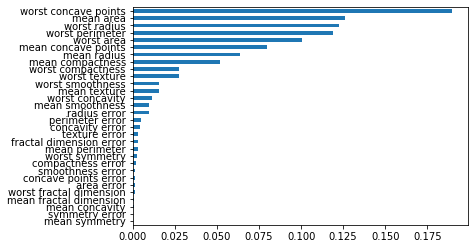

In [12]:
# rank the importance of factor
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(gs.best_estimator_.feature_importances_,
          index=X.columns).sort_values().plot(kind='barh')

### 2. Simple Standlone version for Random Forest

This is the simpler version of the regression forest algorithm that is likely to work very well without dependencies. It's what we used last class.

We split a dataset into a training bundle and a testing bundle. We train a Machine Learning algorithm on the training bundle, and then we test on the test bundle to see *if it guesses right*!

In [13]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X.values, y.values, test_size = 0.25,
                                                                           random_state = 42)

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 10)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
import numpy as np

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

print(predictions)
print(test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

[1.  0.  0.  1.  1.  0.  0.  0.2 0.2 0.9 0.9 0.  0.9 0.  1.  0.  0.9 1.
 1.  0.  0.8 1.  0.  1.  1.  1.  1.  0.7 1.  0.  1.  1.  0.8 1.  1.  1.
 0.1 1.  0.  1.  1.  0.  1.  1.  0.6 1.  0.8 0.9 1.  1.  0.  0.  0.9 1.
 1.  1.  1.  0.  0.2 1.  1.  0.  0.  0.9 1.  0.7 0.  0.  1.  1.  0.1 0.
 1.  0.  1.  1.  1.  0.5 1.  0.8 0.  1.  0.9 0.  0.  0.  0.  0.  1.  1.
 1.  0.7 0.8 1.  1.  1.  0.  0.  1.  0.  0.  1.  0.1 0.  1.  1.  1.  0.
 0.4 0.8 0.  1.  0.7 0.  0.7 0.  1.  0.8 1.  0.  0.5 1.  1.  0.  1.  0.
 0.  1.  1.  0.  0.4 0.  0.9 1.  0.7 0.2 0.4 1.  0.7 0.  1.  0.  1. ]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
Mean Absolute Error: 0.07


In [17]:
# Saving feature names for later use
feature_list = list(X.columns)
feature_list

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [18]:
# What are the synptoms that doctors should be paying attention to, prioritized, in order to correctly diagnose breast cancer?
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: mean concave points  Importance: 0.35
Variable: worst area           Importance: 0.18
Variable: worst concave points Importance: 0.18
Variable: worst perimeter      Importance: 0.08
Variable: worst texture        Importance: 0.04
Variable: mean texture         Importance: 0.02
Variable: area error           Importance: 0.02
Variable: worst concavity      Importance: 0.02
Variable: mean concavity       Importance: 0.01
Variable: mean symmetry        Importance: 0.01
Variable: radius error         Importance: 0.01
Variable: concavity error      Importance: 0.01
Variable: fractal dimension error Importance: 0.01
Variable: worst radius         Importance: 0.01
Variable: worst smoothness     Importance: 0.01
Variable: mean radius          Importance: 0.0
Variable: mean perimeter       Importance: 0.0
Variable: mean area            Importance: 0.0
Variable: mean smoothness      Importance: 0.0
Variable: mean compactness     Importance: 0.0
Variable: mean fractal dimension Importanc

### 3. MOM

Nashville Precipitation

The dataset `nashville_precip.txt` contains NOAA precipitation data for Nashville measured since 1871. It is a classical dataset like the iris dataset. Download it from blackboard and put it in the right folder (you know..). The gamma distribution is a good fit to aggregated rainfall data, and will be our candidate distribution in this case. We'll use the gamma distribution model for Nashville precipitation to demonstrate MOM and MLE.

Let's peek at the data:

In [19]:
import pandas as pd

In [22]:
# load the data
precip = pd.read_table("Lecture4D2/data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


#### 3.1 Data Exploration: The Histogram

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

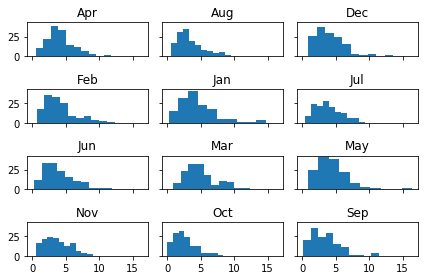

In [25]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data is skewed, with a longer tail to the right than to the left
2. The data is positive-valued, since they are measuring rainfall
3. The data is continuous

Even just by ***eyeballing*** the histograms, ***even if you did not know what the Gamma distribution is usually used for***, a good option appears to be the **gamma distribution**: The curves look like ***Gaussians with long tails***. That's a Gamma!

<div style="font-size: 120%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

#### 3.2 Data Cleansing 

***Wait***, there's something ***wrong*** with our data.. if you open it in a text editor, you will find a value of **NA** for October of 1963 (take a look). 

So we have to do some **data cleansing** first. 

Given what we are trying to do, it is ***sensible*** to fill in the missing value with the average of the available values (another option would have been the average of the months of September and November 1963).


In [26]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,3.32,1.84,2.26,2.75,3.30,2.37,1.47,1.38,1.99,4.95,6.20,3.83
2008,4.76,2.53,5.56,7.20,5.54,2.21,4.32,1.67,0.88,5.03,1.75,6.72
2009,4.59,2.85,2.92,4.13,8.45,4.53,6.03,2.14,11.08,6.49,0.67,3.99


#### 3.3 Method of Moments

The **method of moments** simply assigns the **empirical** (coming from the data) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters***.

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):

<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data:

<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

($\bar{X}$ is the mean, while $S^2$ is the variance of each column of the dataset).

In [27]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [28]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

In [30]:
# calculate the parameters of gamma
alpha_mom = (precip_mean**2)/(precip_var)
beta_mom = (precip_var)/precip_mean
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

In [31]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


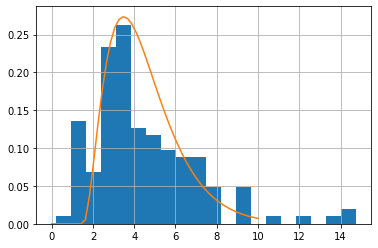

In [32]:
# plot the result of mom
from scipy.stats.distributions import gamma

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

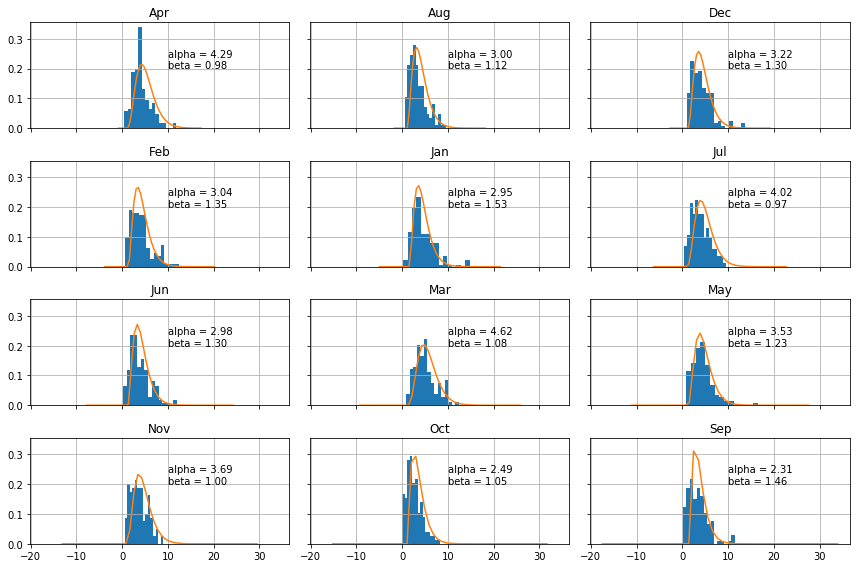

In [34]:
# plot the result of mom for each month
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))

plt.tight_layout()

### 4. MLE

So, let's recap: 

- The product $\prod_{i=1}^n Pr(y_i \; | \; \theta)$ gives us a measure of how **likely** it is to observe values $y_1,\ldots,y_n$ given the parameters $\lambda$. MLE consists in choosing the appropriate function $l= Pr(Y|\theta)$ to maximize for a given set of observations. This function is called the *likelihood function*, because it is a measure of how likely the observations are if the model is true.

In the above model, the data were drawn from a Poisson distribution with parameter $\lambda =5$, That is,

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

Instead of looking at the function above as a function of $y$, let us look at it as a *function of* $\lambda$. Let's calculate the likelihood that the underlying process with $\lambda = 5$ generates any given value of $y$ (note the sexy factorial evaluation below). But let's start with $y$ = 10.

For any given value of $y$, we can calculate its likelihood. We use a python lambda function:

In [35]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 6
value = 10
poisson_like(value, lam)

0.041303093412337726

The probability above is for  𝑦  = 10. What is the probability for all possible  𝑦 's?

In [38]:
np.sum(poisson_like(yi, lam) for yi in set(y))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


0.01735126523666451

That's a pretty high probability!

Let's compare this to the same result for  𝜆  = 8:

In [39]:
lam = 8
np.sum(poisson_like(yi, lam) for yi in set(y))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.003019163651122607

That's lower! Thus,  𝜆  = 5 is a better value, more likely to lead our model to reproduce our dataset, because it gives us a higher probability to observe our  𝑦 's!

(duh, of course it is, the data was drawn from a random Poisson process with  𝜆=5 , but we don't know that -well, we do, but we're pretending we don't :-)

In [40]:
lam = 5
np.sum(poisson_like(yi, lam) for yi in set(y))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.040427681994512805

We can also plot the likelihood function for any value of  𝜆 , for a particular  𝑦  (let's pick  𝑦  = 5, arbitrarily):

Text(0, 0.5, 'L($\\lambda$|x=5)')

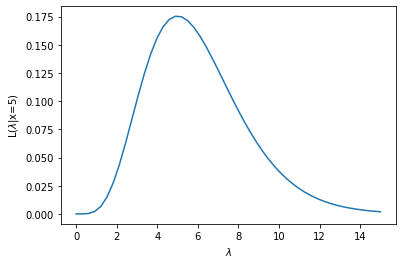

In [41]:
lambdas = np.linspace(0,15)
_y = 5

plt.plot(lambdas, [poisson_like(_y, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(_y))

Looks like  𝜆  = 5 is about right for  𝑦  = 5.

Try it out for other values of  𝑦 . Does the optimal  𝜆  remain the same?

How is the likelihood function different than the probability distribution function (pdf)? The likelihood is a function of the parameter(s) given the data, whereas the pdf returns the probability of data given a particular parameter value.

Here is the pdf of the Poisson for 𝜆=5.

Text(0, 0.5, 'Pr(X|$\\lambda$=5)')

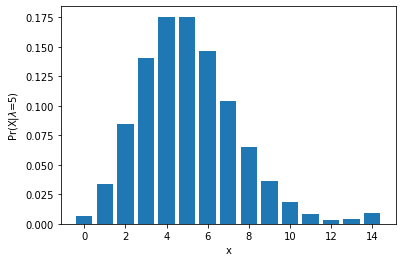

In [42]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')